In [1]:
from matplotlib import pyplot as plt
import numpy as np
import xarray as xa
import pandas as pd
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import pearsonr

In [2]:
file = 'record/record.nc'
ivt = xa.open_dataarray(file)
print(ivt)
daily_ivt = ivt.resample(time='24H', base=12, loffset='24H').mean()
daily_ivt['time'] = daily_ivt.indexes['time'].normalize()
print(daily_ivt.dims)
print(daily_ivt.coords)
print(daily_ivt.shape)
daily_ivt = daily_ivt.assign_coords({'along_transect':daily_ivt.along_transect})

<xarray.DataArray 'VIWVT' (time: 354264, along_transect: 64)>
[22672896 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2019-05-31T23:00:00
Dimensions without coordinates: along_transect
Attributes: (12/15)
    ecmwf_local_table:             162
    ecmwf_parameter:               71
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    long_name:                     Vertical integral of eastward water vapour...
    maximum_value:                 2118.2354
    minimum_value:                 -2627.7244
    ...                            ...
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric vertical integrals (ECMWF...
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    short_name:                    viwve
    units:                         kg m**-1 s**-1
    cell_methods:                  perp_transect: mean
('time', 'along_transect

In [3]:
def is_monsoon(month):
    return (month<=9) & (month>=6)
monsoon_ivt = daily_ivt.sel(time=(is_monsoon(daily_ivt.time.dt.month)))
monsoon_ivt = monsoon_ivt.sel(time=monsoon_ivt.time.dt.year<2019)
print(monsoon_ivt.shape)
print(monsoon_ivt)

(4880, 64)
<xarray.DataArray 'VIWVT' (time: 4880, along_transect: 64)>
array([[ 61.7865097 ,  56.58669224,  51.59684841, ...,   8.16631739,
          5.21707788,   3.67114291],
       [187.09110234, 175.19109968, 161.74113644, ...,  12.15155532,
          6.4398887 ,   1.60494047],
       [ 94.95875458, 103.26933058, 110.29708492, ...,  36.28398569,
         32.90343903,  29.59071654],
       ...,
       [183.50148952, 180.58828393, 171.09535057, ...,  21.3299975 ,
         20.82974324,  20.6241718 ],
       [ 98.30017   , 100.39214953, 103.00911883, ...,  41.24870036,
         42.48363183,  45.65281489],
       [ 21.97915307,  16.52333521,  12.91237249, ...,  68.58378555,
         68.15096986,  67.96295399]])
Coordinates:
  * time            (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2018-09-30
  * along_transect  (along_transect) int64 0 1 2 3 4 5 6 ... 58 59 60 61 62 63


<xarray.DataArray 'VIWVT' (along_transect: 64)>
array([371.83248553, 370.27473557, 363.38377991, 356.532657  ,
       352.21223799, 345.45699621, 343.24059922, 333.27493393,
       329.71487842, 326.40679747, 322.1223817 , 317.65728552,
       312.28124528, 302.56265609, 300.1683124 , 296.66074986,
       293.10111254, 285.90452775, 281.35538355, 275.32895986,
       270.14350916, 266.57902048, 262.55481873, 260.34120543,
       256.48602528, 250.37965366, 250.53811338, 245.94654519,
       239.78754947, 234.99175411, 232.84156105, 229.05120255,
       225.75283284, 221.88960679, 218.0933601 , 214.83304516,
       212.84766999, 210.96813382, 207.55361767, 203.79211812,
       201.99812801, 199.7710099 , 198.65748774, 198.58252738,
       198.47416567, 197.94251939, 196.05172687, 194.88225592,
       194.16011186, 193.37317723, 192.28175929, 187.7291698 ,
       182.10621982, 176.30645915, 170.14448837, 165.28430891,
       160.5005208 , 153.33283884, 146.85760698, 139.39989431,
       

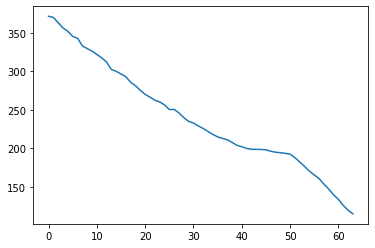

In [4]:
quantiles = monsoon_ivt.quantile(.95, dim='time')
print(quantiles)
plt.plot(quantiles)
plt.show()

In [5]:
surge_date = []
for i in range(64):
    ivt_record = monsoon_ivt.sel(along_transect=i)
    dates = ivt_record[ivt_record>quantiles.sel(along_transect=i)].time.data
    surge_date.append(dates)
surge_date = np.concatenate(surge_date)
print(surge_date.shape)
surge_date = sorted(np.unique(surge_date))
print(len(surge_date))

(15616,)
819


In [6]:
for i in range(20):
    print(surge_date[i])

1979-07-16T00:00:00.000000000
1979-07-17T00:00:00.000000000
1979-07-30T00:00:00.000000000
1979-07-31T00:00:00.000000000
1979-08-05T00:00:00.000000000
1979-08-06T00:00:00.000000000
1979-08-07T00:00:00.000000000
1979-08-12T00:00:00.000000000
1979-09-08T00:00:00.000000000
1979-09-11T00:00:00.000000000
1979-09-12T00:00:00.000000000
1979-09-13T00:00:00.000000000
1979-09-14T00:00:00.000000000
1979-09-15T00:00:00.000000000
1979-09-16T00:00:00.000000000
1979-09-25T00:00:00.000000000
1980-06-30T00:00:00.000000000
1980-07-01T00:00:00.000000000
1980-07-02T00:00:00.000000000
1980-07-06T00:00:00.000000000


In [17]:
def detect_surge(year, verbose=True):
    surge = {}
    count=0
    year_record = monsoon_ivt.sel(time=monsoon_ivt.time.dt.year==year)
    ivt_high = year_record.where(year_record>quantiles)
    fig = plt.figure(figsize=(7,7))
    ivt_high.plot()
    plt.show()
    flag=0
    time = year_record.time.data
    for i in range(122):
        record = ivt_high.data[i]
        if len(np.where(~np.isnan(record))[0])>0:
            if flag==0:
                start=i
                # print('START: ', start)
                flag=1
                start_ind = np.where(~np.isnan(record))[0]
            ind = np.where(~np.isnan(record))[0]
            if len(np.intersect1d(ind, start_ind))>0:
                start_ind=ind
            else:
                end=i-1
                if end-start>=1:
                    if verbose:
                        print(time[start], time[end], start, end)
                start=i
                start_ind=ind
                # print(i, 'ELSE: START: ', start,' END: ',  end, ' FLAG: ', flag)
            if verbose:
                print(i, ' ', ind)

        else:
            end=i-1
            if flag==1:
                if end-start>=1:
                    if verbose:
                        print(time[start], time[end], start, end)
                    surge[count] = [time[start], time[end]]
                    count+=1
            flag=0
    if flag==1:
        if 121-start>=1:
            if verbose:
                print(time[start], time[121], start, 121)
            surge[count] = [time[start], time[121]]
            count+=1
    return surge, count

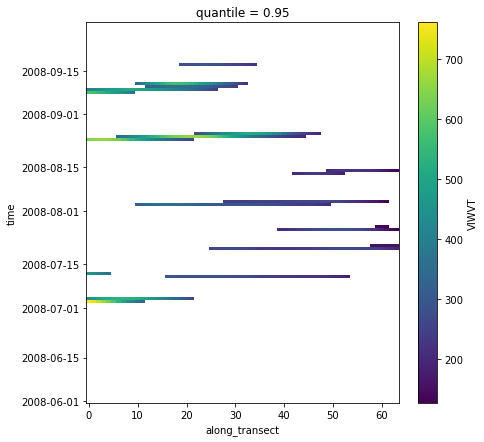

7


In [18]:
surge, count = detect_surge(2008, verbose=False)
print(count)

In [19]:
print(surge)

{0: [numpy.datetime64('2008-07-03T00:00:00.000000000'), numpy.datetime64('2008-07-04T00:00:00.000000000')], 1: [numpy.datetime64('2008-07-20T00:00:00.000000000'), numpy.datetime64('2008-07-21T00:00:00.000000000')], 2: [numpy.datetime64('2008-07-26T00:00:00.000000000'), numpy.datetime64('2008-07-27T00:00:00.000000000')], 3: [numpy.datetime64('2008-08-03T00:00:00.000000000'), numpy.datetime64('2008-08-04T00:00:00.000000000')], 4: [numpy.datetime64('2008-08-13T00:00:00.000000000'), numpy.datetime64('2008-08-14T00:00:00.000000000')], 5: [numpy.datetime64('2008-08-24T00:00:00.000000000'), numpy.datetime64('2008-08-26T00:00:00.000000000')], 6: [numpy.datetime64('2008-09-08T00:00:00.000000000'), numpy.datetime64('2008-09-11T00:00:00.000000000')]}


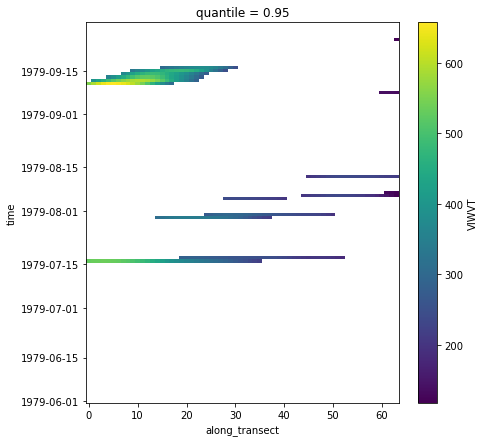

1979   4


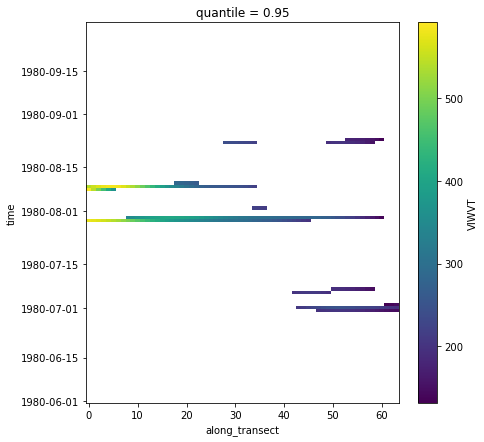

1980   4


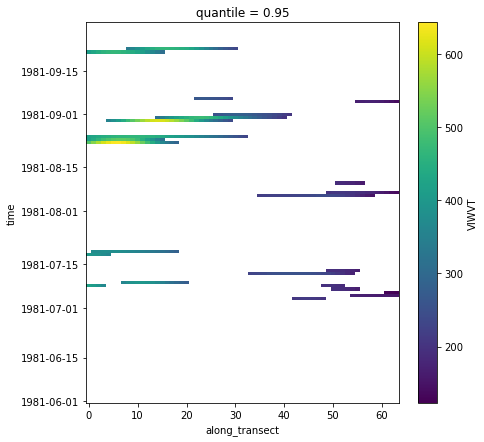

1981   6


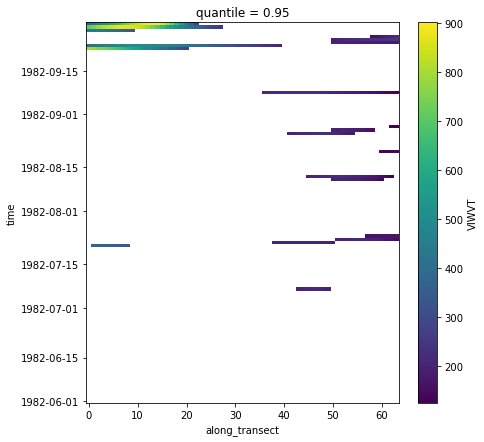

1982   4


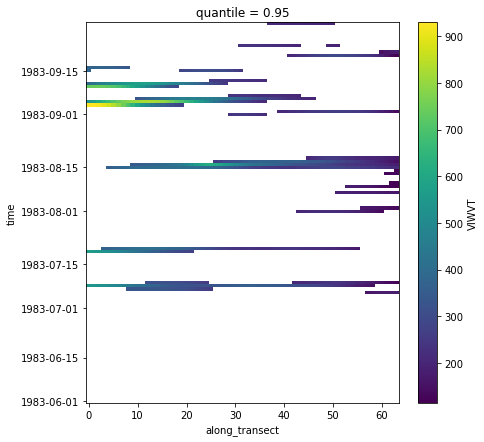

1983   9


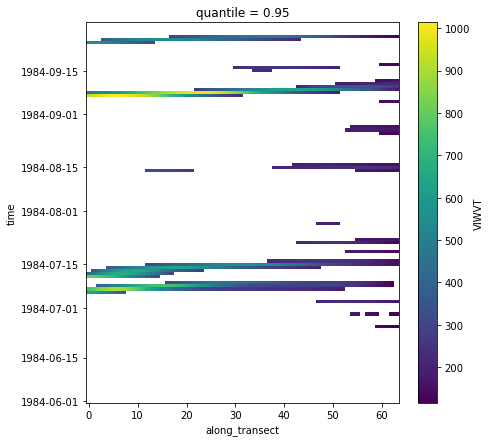

1984   7


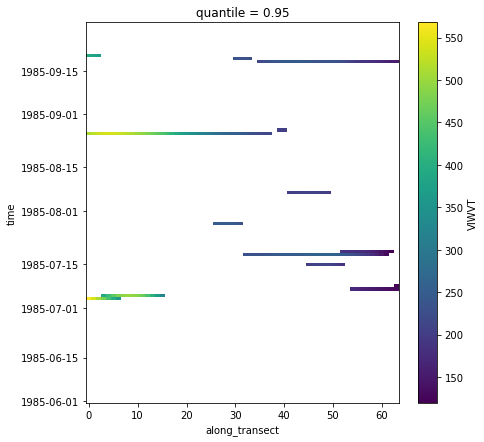

1985   3


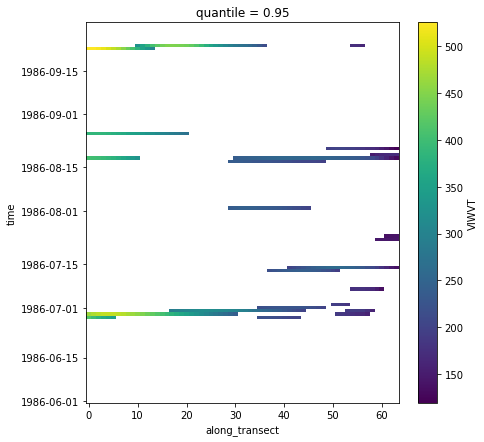

1986   4


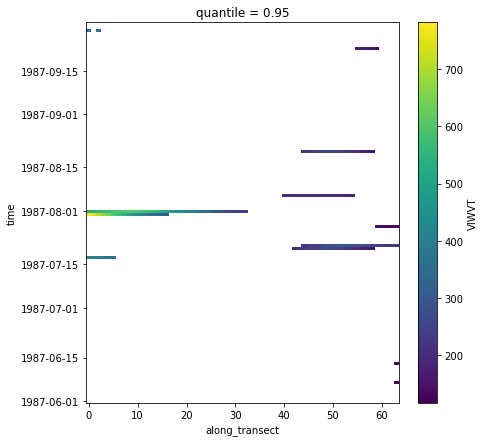

1987   2


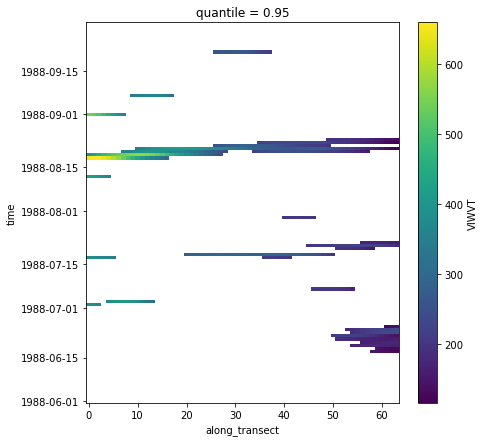

1988   4


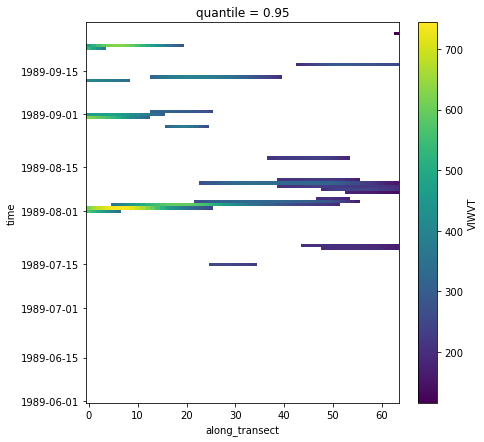

1989   5


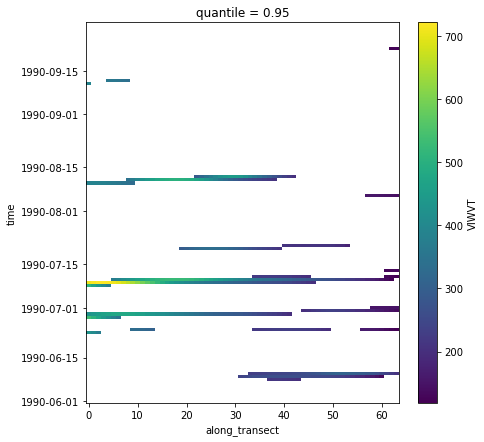

1990   4


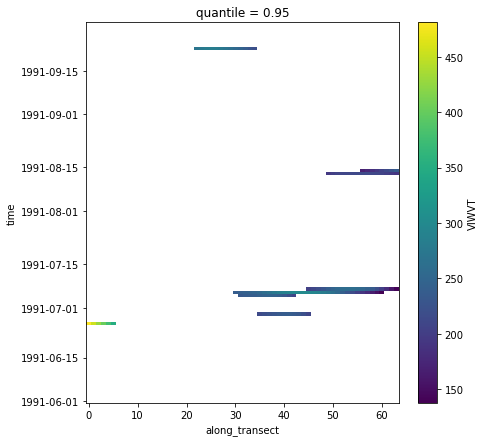

1991   2


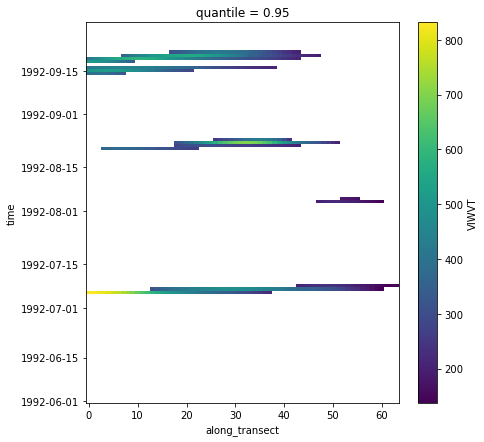

1992   5


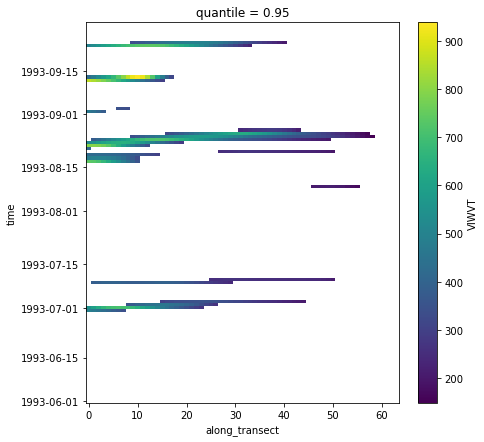

1993   5


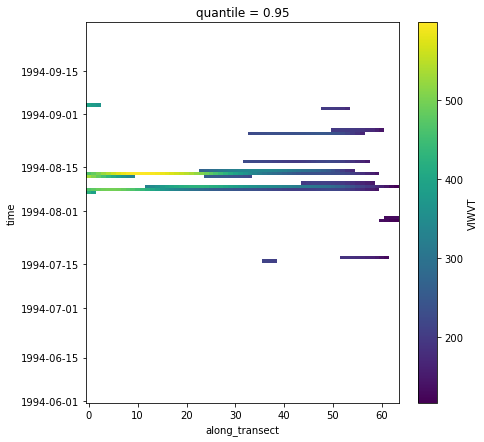

1994   4


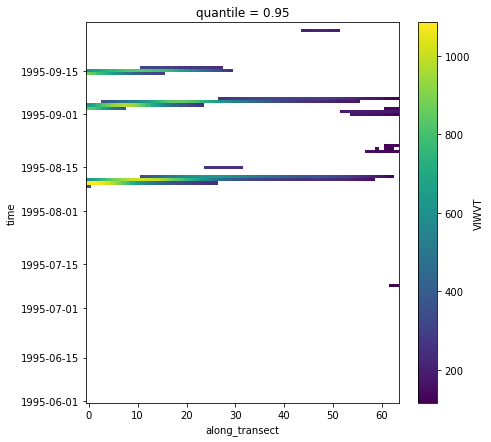

1995   4


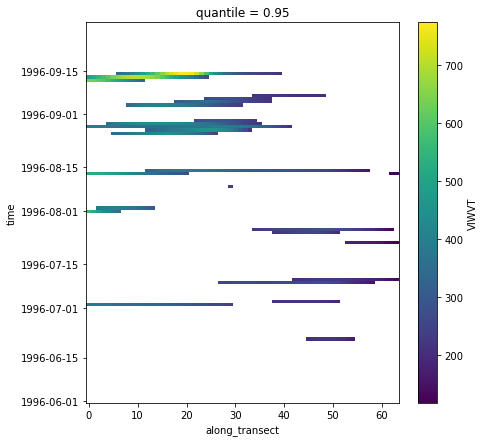

1996   7


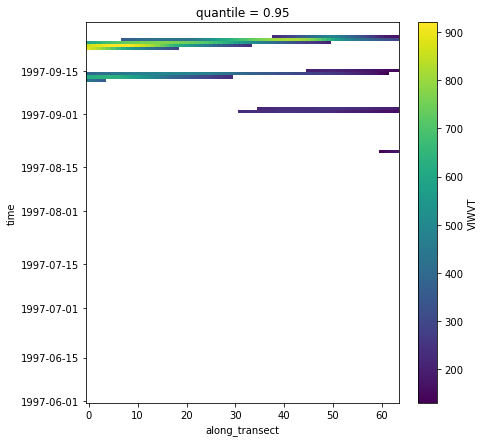

1997   3


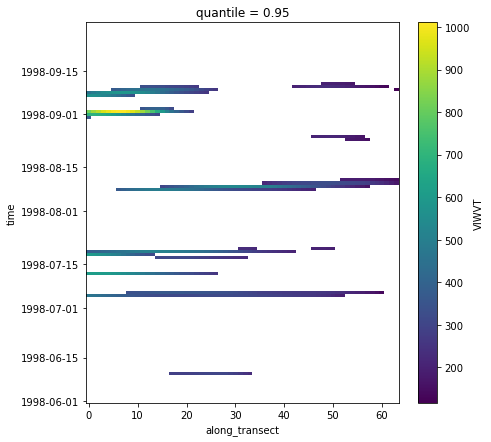

1998   6


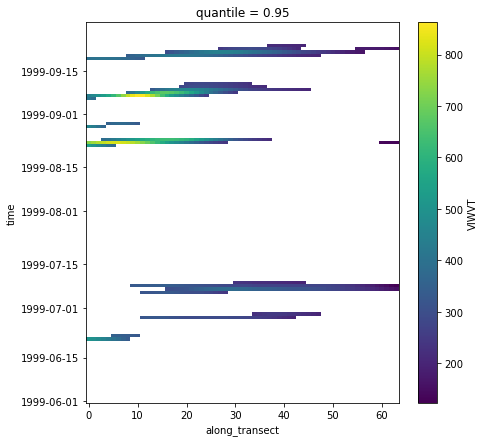

1999   6


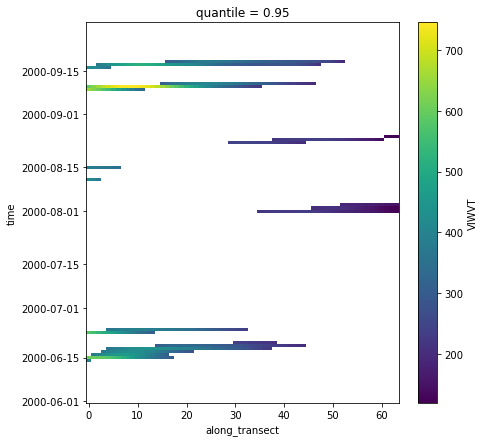

2000   5


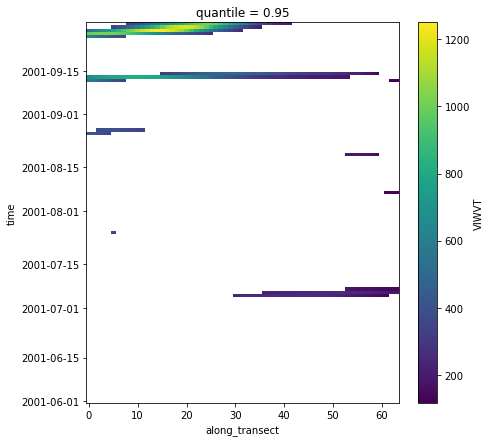

2001   4


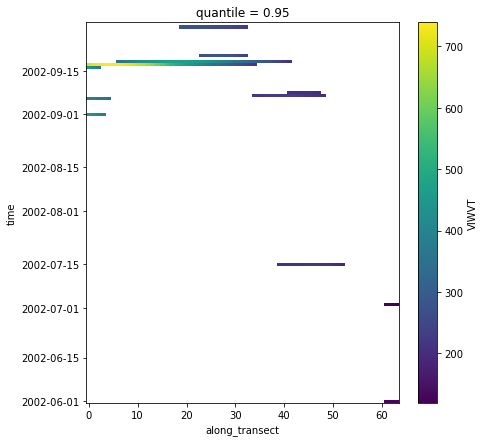

2002   2


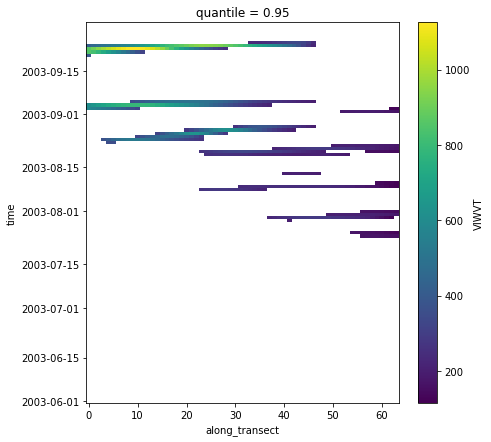

2003   6


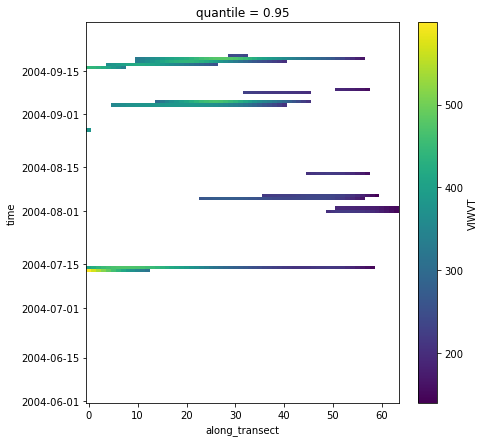

2004   5


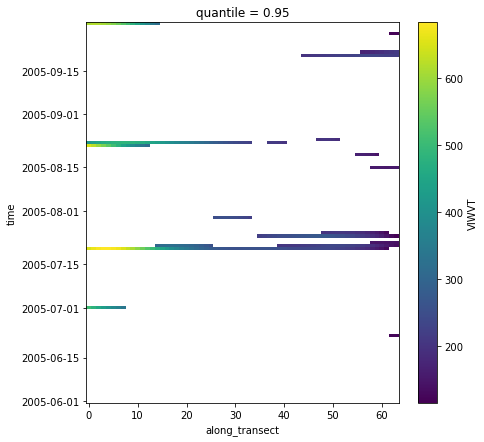

2005   3


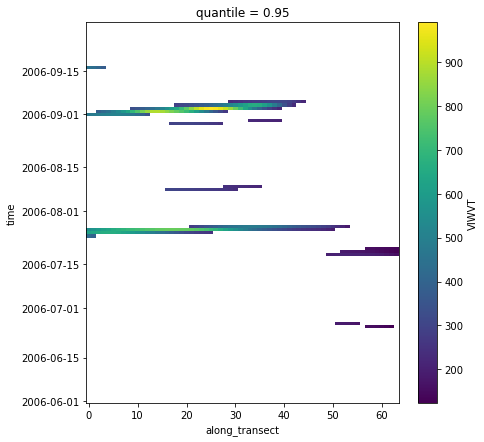

2006   4


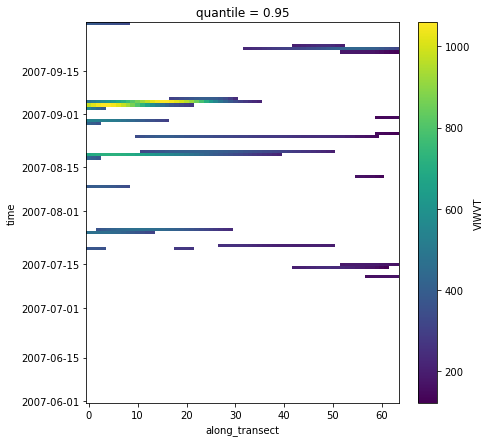

2007   6


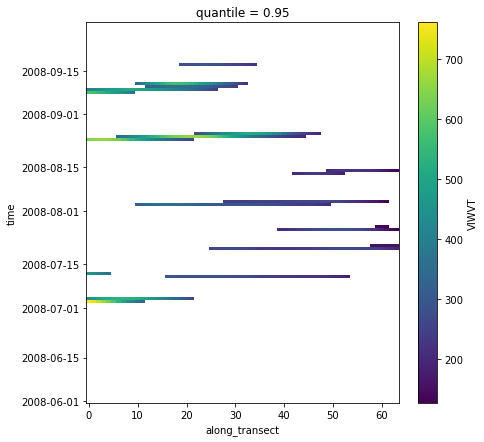

2008   7


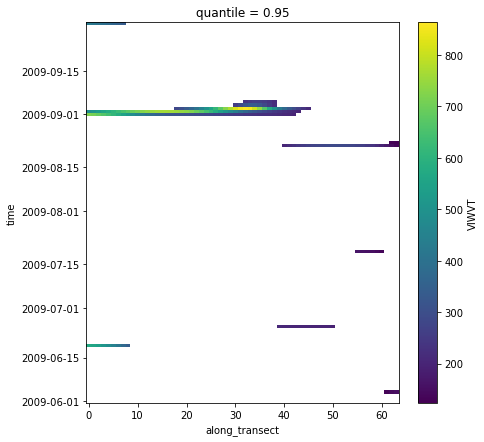

2009   2


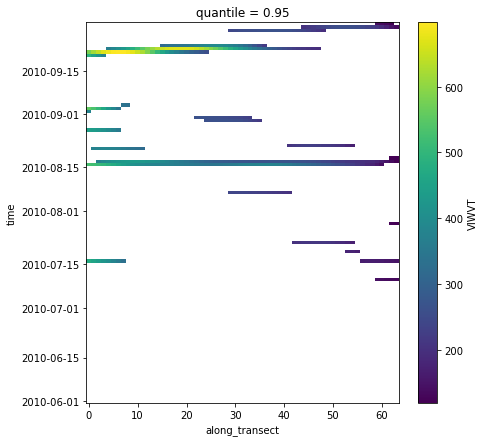

2010   4


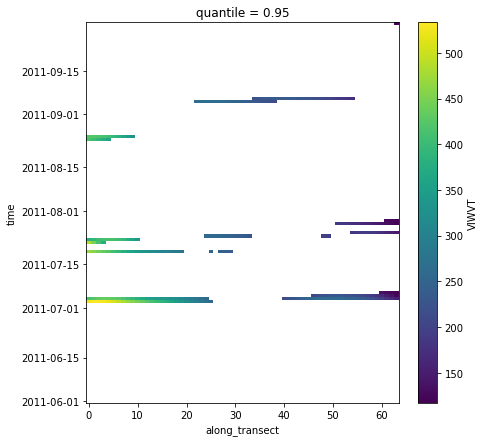

2011   4


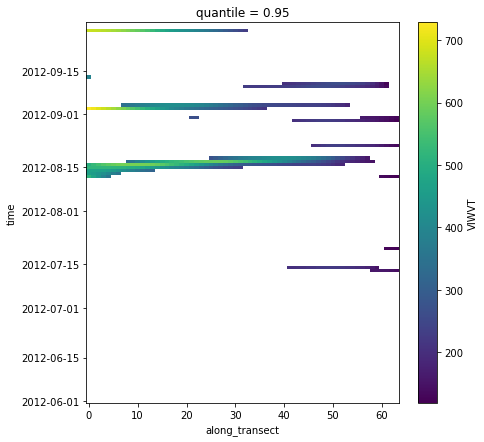

2012   5


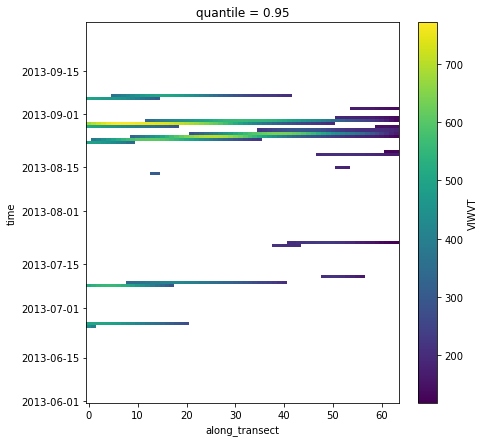

2013   6


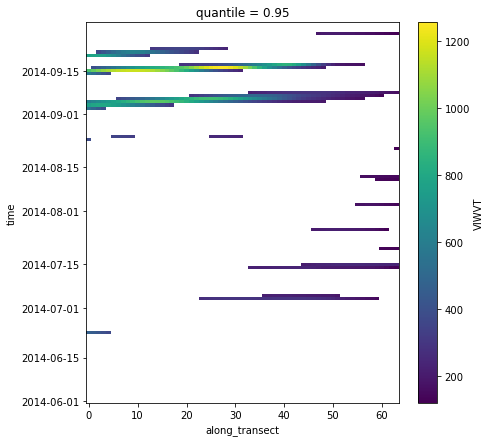

2014   6


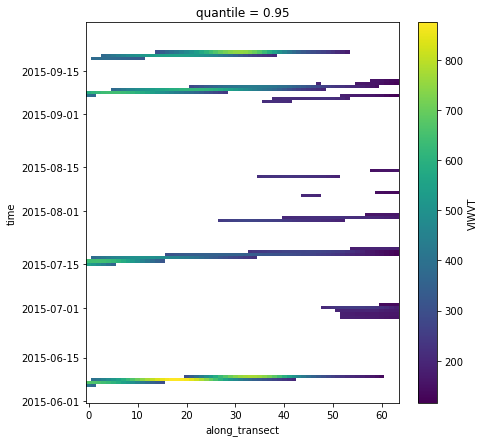

2015   6


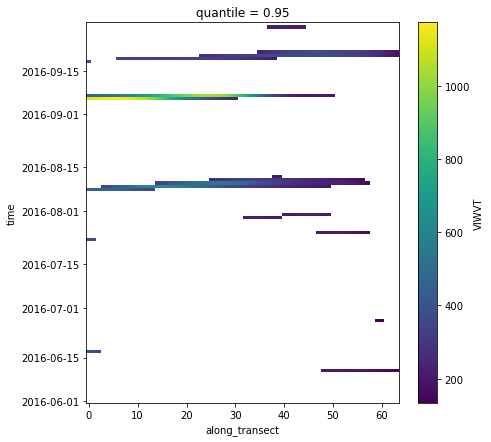

2016   3


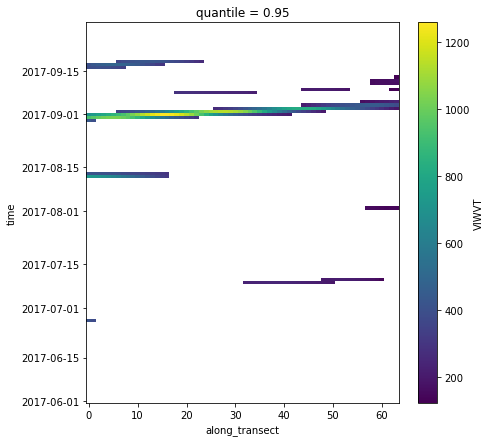

2017   5


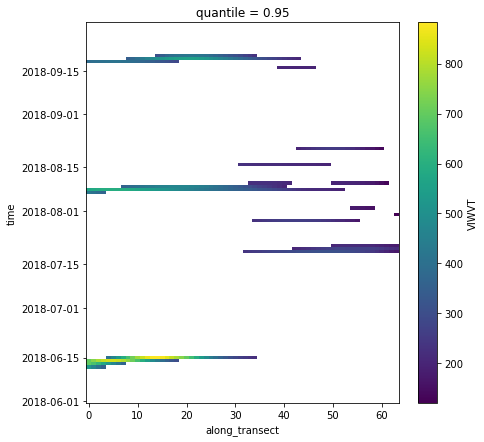

2018   4


In [21]:
surge_start_time = []
surge_end_time = []
for year in range(1979, 2019):
    surge, count = detect_surge(year, verbose=False)
    print(year, ' ', count)
    for surge_id in range(count):
        surge_start_time.append(surge[surge_id][0])
        surge_end_time.append(surge[surge_id][1])
        

In [31]:
print(len(surge_start_time))
print(len(surge_end_time))
surge_index = np.arange(185)
start_time = xa.Variable(data=surge_start_time, dims=['index'])
end_time = xa.Variable(data=surge_end_time, dims=['index'])
surge = xa.Dataset({'start_time': start_time, 'end_time': end_time}, coords={'index': surge_index})
print(surge)

185
185
<xarray.Dataset>
Dimensions:     (index: 185)
Coordinates:
  * index       (index) int64 0 1 2 3 4 5 6 7 ... 178 179 180 181 182 183 184
Data variables:
    start_time  (index) datetime64[ns] 1979-07-16 1979-07-30 ... 2018-09-18
    end_time    (index) datetime64[ns] 1979-07-17 1979-07-31 ... 2018-09-20


In [33]:
surge.to_netcdf('MoistureSurge.nc')